In [1]:
from model import Net
from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
              ReLU-3           [-1, 16, 26, 26]               0
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]           1,450
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           1,456
      BatchNorm2d-11           [-1, 16, 10, 10]              32
             ReLU-12           [-1, 16, 10, 10]               0
          Dropout-13           [-1, 16, 10, 10]               0
           Conv2d-14             [-1, 1

Batch Size torch.Size([128, 1, 28, 28])


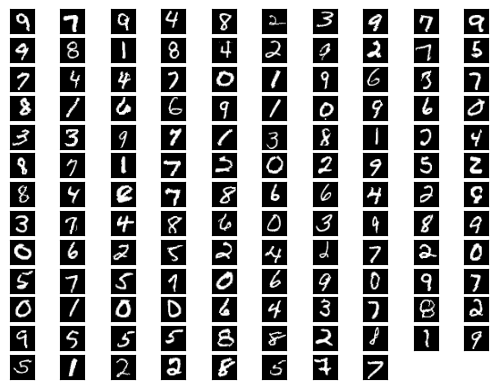

In [3]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [4]:
import torch.optim as optim
import torch.nn.functional as F
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1609 Batch_id=468 Accuracy=84.01: 100%|██████████| 469/469 [00:39<00:00, 11.75it/s]

[92.75704879284147, 93.11776920795016, 86.27056059080228, 79.8727776871636, 79.08250599109894, 79.45028592510607, 82.76444744846232, 81.40462889066241, 81.76380105964792, 82.13145066397713]


Test set: Average loss: 0.0953, Accuracy: 9709/10000 (97.09%)

[99.59183673469387, 99.55947136563876, 96.89922480620154, 95.34653465346534, 96.02851323828921, 96.74887892376681, 98.01670146137788, 98.24902723735408, 94.6611909650924, 95.44103072348861]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1224 Batch_id=468 Accuracy=96.50: 100%|██████████| 469/469 [00:40<00:00, 11.62it/s]

[98.10906635151106, 98.04212399881341, 95.65290365894596, 96.41167835589627, 95.99452242382746, 96.31064379265818, 97.19499831023994, 96.45650438946528, 95.6588617330371, 94.99075474869726]


Test set: Average loss: 0.0526, Accuracy: 9837/10000 (98.37%)

[99.59183673469387, 98.59030837004406, 99.2248062015504, 98.91089108910892, 98.37067209775967, 98.4304932735426, 98.8517745302714, 95.52529182879378, 99.28131416837782, 97.02675916749257]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0957 Batch_id=468 Accuracy=97.18: 100%|██████████| 469/469 [00:40<00:00, 11.63it/s]

[98.61556643592773, 98.54642539305843, 96.59281638133602, 97.14565323764475, 96.83327627524821, 96.86404722375946, 97.78641432916527, 97.20670391061452, 96.32541445906682, 95.69675575727013]


Test set: Average loss: 0.0397, Accuracy: 9870/10000 (98.70%)

[99.79591836734694, 99.03083700440529, 98.83720930232558, 99.4059405940594, 98.37067209775967, 98.65470852017937, 99.26931106471815, 98.24902723735408, 97.94661190965093, 97.42319127849356]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0740 Batch_id=468 Accuracy=97.49: 100%|██████████| 469/469 [00:40<00:00, 11.71it/s]

[98.81816646969442, 98.66508454464551, 96.91171534071836, 97.65128037840482, 97.07292023279699, 97.38055709278731, 98.24264954376478, 97.35035913806863, 96.68432746539052, 95.98251807026391]


Test set: Average loss: 0.0351, Accuracy: 9885/10000 (98.85%)

[99.59183673469387, 99.29515418502203, 98.93410852713178, 99.5049504950495, 97.35234215885947, 98.87892376681614, 98.53862212943632, 98.54085603112841, 98.4599589322382, 99.30624380574827]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0627 Batch_id=468 Accuracy=97.76: 100%|██████████| 469/469 [00:40<00:00, 11.50it/s]

[98.8856998142833, 98.67991693859389, 97.29775092312856, 97.79807535475452, 97.51797329681617, 97.45434421693415, 98.34403514700912, 97.89305666400638, 97.00905828063578, 96.5372331484283]


Test set: Average loss: 0.0287, Accuracy: 9910/10000 (99.10%)

[99.6938775510204, 99.64757709251101, 98.93410852713178, 98.21782178217822, 99.18533604887983, 98.87892376681614, 98.95615866388309, 99.12451361867704, 99.48665297741273, 98.81070366699703]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0441 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:40<00:00, 11.61it/s]

[98.97011649501941, 98.8430732720261, 97.29775092312856, 97.99380198988746, 97.86032180760014, 97.71259915144807, 98.47921595133491, 97.7972865123703, 97.24833361818493, 96.52042360060514]


Test set: Average loss: 0.0272, Accuracy: 9909/10000 (99.09%)

[99.79591836734694, 99.55947136563876, 99.32170542635659, 98.8118811881188, 98.4725050916497, 99.2152466367713, 98.43423799582463, 98.92996108949417, 99.07597535934292, 99.20713577799802]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1543 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:40<00:00, 11.65it/s]

[98.86881647813608, 99.0210619994067, 97.73413897280967, 98.07535475452617, 97.96302636083533, 97.87862018077846, 98.49611355187562, 98.1803671189146, 97.41924457357717, 97.10875777441586]


Test set: Average loss: 0.0280, Accuracy: 9914/10000 (99.14%)

[99.79591836734694, 99.55947136563876, 99.6124031007752, 99.5049504950495, 99.28716904276986, 98.4304932735426, 98.32985386221294, 98.92996108949417, 99.17864476386036, 98.61248761149653]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0211 Batch_id=468 Accuracy=98.15: 100%|██████████| 469/469 [00:40<00:00, 11.56it/s]

[99.00388316731387, 99.09522396914862, 97.78449144008057, 98.25477083673137, 97.89455665867854, 97.74949271352149, 98.64819195674214, 98.43575418994413, 97.55597333789096, 96.9070432005379]


Test set: Average loss: 0.0254, Accuracy: 9924/10000 (99.24%)

[99.79591836734694, 99.20704845814979, 99.03100775193798, 99.3069306930693, 99.89816700610999, 98.99103139013454, 98.32985386221294, 99.5136186770428, 99.69199178644764, 98.61248761149653]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0316 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:40<00:00, 11.60it/s]

[98.81816646969442, 98.96173242361317, 97.85162806310842, 98.07535475452617, 98.3396097226977, 97.9893008669987, 98.78337276106794, 98.22825219473265, 97.88070415313621, 97.22642460917801]


Test set: Average loss: 0.0261, Accuracy: 9915/10000 (99.15%)

[99.6938775510204, 99.64757709251101, 99.03100775193798, 99.70297029702971, 99.38900203665987, 98.87892376681614, 98.74739039665971, 98.92996108949417, 98.35728952772074, 99.00891972249752]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0139 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:39<00:00, 11.73it/s]

[99.29089988181666, 99.03589439335508, 97.78449144008057, 98.43418691893655, 98.08284833960971, 98.02619442907212, 98.74957755998648, 98.14844373503591, 97.57306443343018, 97.31047234829383]


Test set: Average loss: 0.0231, Accuracy: 9932/10000 (99.32%)

[99.6938775510204, 99.91189427312776, 99.12790697674419, 99.20792079207921, 99.79633401221996, 98.87892376681614, 99.16492693110646, 99.12451361867704, 98.870636550308, 99.30624380574827]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0359 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:40<00:00, 11.60it/s]

[98.93634982272496, 99.1990507267873, 97.88519637462235, 98.22214973087587, 98.23690516946252, 98.13687511529238, 98.74957755998648, 98.29209896249003, 98.06870620406768, 97.49537737434864]


Test set: Average loss: 0.0222, Accuracy: 9933/10000 (99.33%)

[99.6938775510204, 99.55947136563876, 99.12790697674419, 99.70297029702971, 99.4908350305499, 99.2152466367713, 98.95615866388309, 99.22178988326849, 99.28131416837782, 99.00891972249752]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0183 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:40<00:00, 11.65it/s]

[99.20648320108053, 99.13972115099378, 98.25444780127559, 98.35263415429783, 98.56213625470728, 98.21066223943922, 98.66508955728287, 98.48363926576216, 98.17125277730302, 97.54580601781811]


Test set: Average loss: 0.0226, Accuracy: 9926/10000 (99.26%)

[99.89795918367346, 99.11894273127754, 99.32170542635659, 99.60396039603961, 99.59266802443992, 99.10313901345292, 98.95615866388309, 99.5136186770428, 98.97330595482546, 98.51337958374629]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0245 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:40<00:00, 11.66it/s]

[99.18959986493331, 99.15455354494216, 98.2040953340047, 98.62991355406947, 98.52790140362889, 98.46891717395314, 98.81716796214938, 98.75498802873105, 98.03452401298924, 97.71390149604976]


Test set: Average loss: 0.0235, Accuracy: 9919/10000 (99.19%)

[99.79591836734694, 99.47136563876651, 99.32170542635659, 99.20792079207921, 99.69450101832994, 98.09417040358744, 99.16492693110646, 99.41634241245137, 98.870636550308, 98.71159563924678]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0108 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:40<00:00, 11.68it/s]

[99.27401654566943, 99.25838030258085, 98.33836858006042, 98.3363236013701, 98.4765491270113, 98.32134292565947, 98.86786076377155, 98.27613727055068, 98.11997949068535, 97.54580601781811]


Test set: Average loss: 0.0200, Accuracy: 9939/10000 (99.39%)

[99.89795918367346, 99.73568281938327, 99.8062015503876, 99.4059405940594, 99.4908350305499, 99.32735426008968, 98.64300626304802, 98.92996108949417, 99.48665297741273, 99.10802775024777]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0181 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:40<00:00, 11.66it/s]

[99.27401654566943, 99.24354790863245, 98.18731117824774, 98.49942913064753, 98.3567271482369, 98.11842833425567, 98.81716796214938, 98.53152434158021, 98.11997949068535, 97.69709194822659]


Test set: Average loss: 0.0198, Accuracy: 9932/10000 (99.32%)

[99.6938775510204, 99.20704845814979, 99.4186046511628, 99.5049504950495, 99.08350305498982, 99.55156950672645, 99.26931106471815, 99.41634241245137, 98.870636550308, 99.20713577799802]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0214 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:40<00:00, 11.60it/s]

[99.20648320108053, 99.31770987837437, 98.50621013763008, 98.49942913064753, 98.61348853132489, 98.72717210846707, 99.10442717134167, 98.83479648842778, 98.46180140146984, 97.71390149604976]


Test set: Average loss: 0.0170, Accuracy: 9943/10000 (99.43%)

[99.6938775510204, 99.64757709251101, 99.4186046511628, 99.60396039603961, 99.59266802443992, 99.32735426008968, 98.95615866388309, 99.31906614785993, 99.28131416837782, 99.40535183349851]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0229 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:41<00:00, 11.32it/s]

[99.34154989025832, 99.42153663601306, 98.5901309164149, 98.87457184798565, 98.76754536117768, 98.7825124515772, 99.17201757350456, 98.80287310454908, 98.49598359254828, 98.06690200033619]


Test set: Average loss: 0.0172, Accuracy: 9946/10000 (99.46%)

[99.6938775510204, 99.64757709251101, 99.6124031007752, 99.60396039603961, 99.79633401221996, 99.2152466367713, 98.64300626304802, 99.41634241245137, 99.38398357289527, 99.50445986124876]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0274 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:40<00:00, 11.58it/s]

[99.30778321796387, 99.36220706021952, 98.47264182611615, 98.7440874245637, 98.63060595686409, 98.69027854639366, 99.07063197026022, 98.64325618515562, 98.34216373269527, 98.150949739452]


Test set: Average loss: 0.0172, Accuracy: 9942/10000 (99.42%)

[99.79591836734694, 99.73568281938327, 99.4186046511628, 99.60396039603961, 99.69450101832994, 99.2152466367713, 98.8517745302714, 99.5136186770428, 99.07597535934292, 99.20713577799802]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0629 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:40<00:00, 11.66it/s]

[99.54414992402498, 99.39187184811628, 98.65726753944276, 98.8582612950579, 98.71619308456008, 98.46891717395314, 99.17201757350456, 98.7390263367917, 98.6498034524013, 98.05009245251303]


Test set: Average loss: 0.0167, Accuracy: 9943/10000 (99.43%)

[99.79591836734694, 99.64757709251101, 99.4186046511628, 99.60396039603961, 99.69450101832994, 99.32735426008968, 98.74739039665971, 99.31906614785993, 99.17864476386036, 99.50445986124876]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0265 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:40<00:00, 11.57it/s]

[99.37531656255277, 99.30287748442599, 98.37193689157435, 98.80932963627467, 98.80178021225608, 98.59804464121011, 99.07063197026022, 98.80287310454908, 98.56434797470519, 98.28542612203732]


Test set: Average loss: 0.0165, Accuracy: 9947/10000 (99.47%)

[99.79591836734694, 99.64757709251101, 99.51550387596899, 99.60396039603961, 99.79633401221996, 99.32735426008968, 99.16492693110646, 99.31906614785993, 99.28131416837782, 99.20713577799802]
Adjusting learning rate of group 0 to 1.0000e-03.
